In [127]:
import librosa
import os 
import numpy as np
import os
import matplotlib.pyplot as plt


In [8]:
# import wave
# import contextlib

# fname = "../guitar_audio_transcription/data/audio_hex-pickup_debleeded/00_BN1-129-Eb_comp_hex_cln.wav"

# import librosa
# dur = librosa.get_duration(filename=fname)

In [216]:
import librosa
import os 
import numpy as np
import os
import matplotlib.pyplot as plt


def cqt_lim(CQT, min = -60, max = -120):
    new_CQT = np.copy(CQT)
    new_CQT[new_CQT < min] = max
    return new_CQT

def audio_CQT(file_path, start, stop, min = -60, max = -120):
    
    # Perform the Constant-Q Transform
    data, sr = librosa.load(file_path, sr = None, mono = True, offset = start, duration = stop - start)
    CQT = librosa.cqt(data, sr = 44100, hop_length = 1024, fmin = None, n_bins = 96, bins_per_octave = 12)
    CQT_mag = librosa.magphase(CQT)[0]**4
    CQTdB = librosa.core.amplitude_to_db(CQT_mag, ref = np.amax)
    new_CQT = cqt_lim(CQTdB, min = min, max = max)
    return new_CQT

def get_spectros(path_to_files):
    
    try:
        path_to_spec = os.path.join(path_to_files, '..', os.path.split(path_to_files)[1] + "_spectros")
        os.mkdir(path_to_spec)
    
    except FileExistsError:
        pass 
    
    for elem in os.listdir(path_to_files):
        if elem.endswith('.wav'):
            
            dur_total = librosa.get_duration(filename = os.path.join(path_to_files,elem))
            
            file_folder = os.path.join(path_to_spec,elem.strip('.wav'))
            os.mkdir(file_folder)
   
            times = [x / 10.0 for x in range(0, int(round(dur_total, 1) * 10), 2)]
            
            for time in times:
                
                if times[times.index(time)] != times[-1]:
                    
                    time2 = times[times.index(time) + 1]
                    
                    array = audio_CQT(os.path.join(path_to_files, elem), time, time2)

                    librosa.display.specshow(array) #y_axis='cqt_note'
                    plt.savefig(f"{file_folder}/{time}-{time2}.png")
                    plt.close()

                    


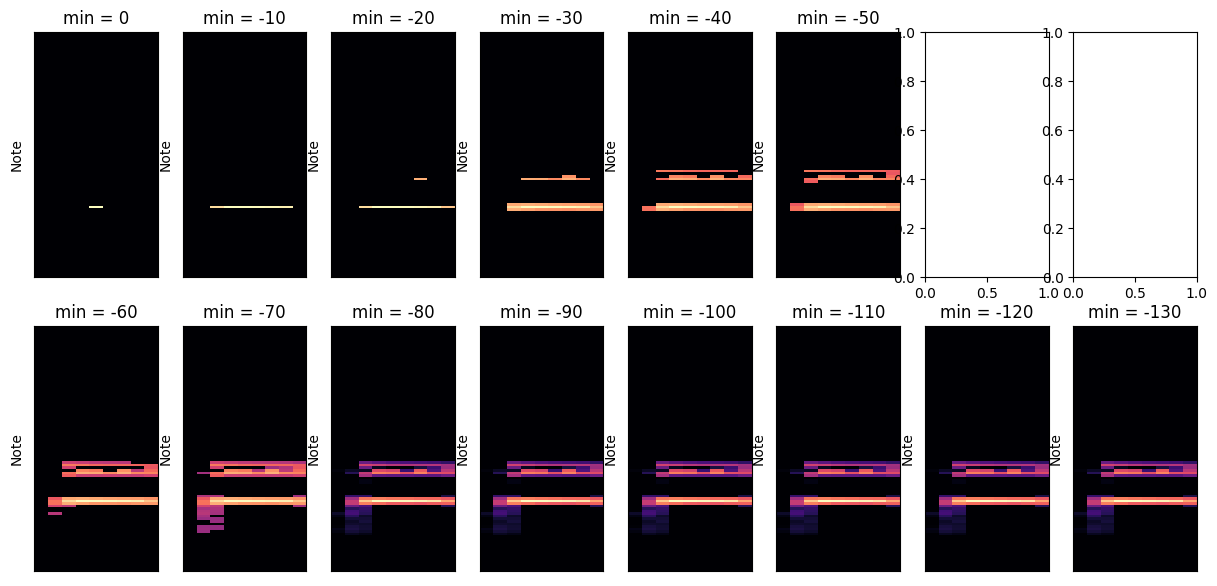

In [215]:
fig, ax = plt.subplots(2, 8, figsize=(15,7))

for i in [0 , -10, -20, -30, -40, -50, -60, -70, -80, -90, -100, -110, -120, -130]:
    
    idx = [0 , -10, -20, -30, -40, -50, -60, -70, -80, -90, -100, -110, -120, -130].index(i)
    if i in [-60, -70, -80, -90, -100, -110, -120, -130]:
        idx = idx - 6
    
    if i in [-60, -70, -80, -90, -100, -110, -120, -130]:
        idx2 = 1
    else:
        idx2 = 0
        
    array = audio_CQT("../guitar_audio_transcription/data/yui/00_BN1-129-Eb_comp_hex_cln.wav", 0, 0.2, min = i, max = -120)
    librosa.display.specshow(array, y_axis='cqt_note', ax=ax[idx2, idx]) #y_axis='cqt_note'
    ax[idx2, idx].set_title(f"min = {i}")
    


## SEGUNDO

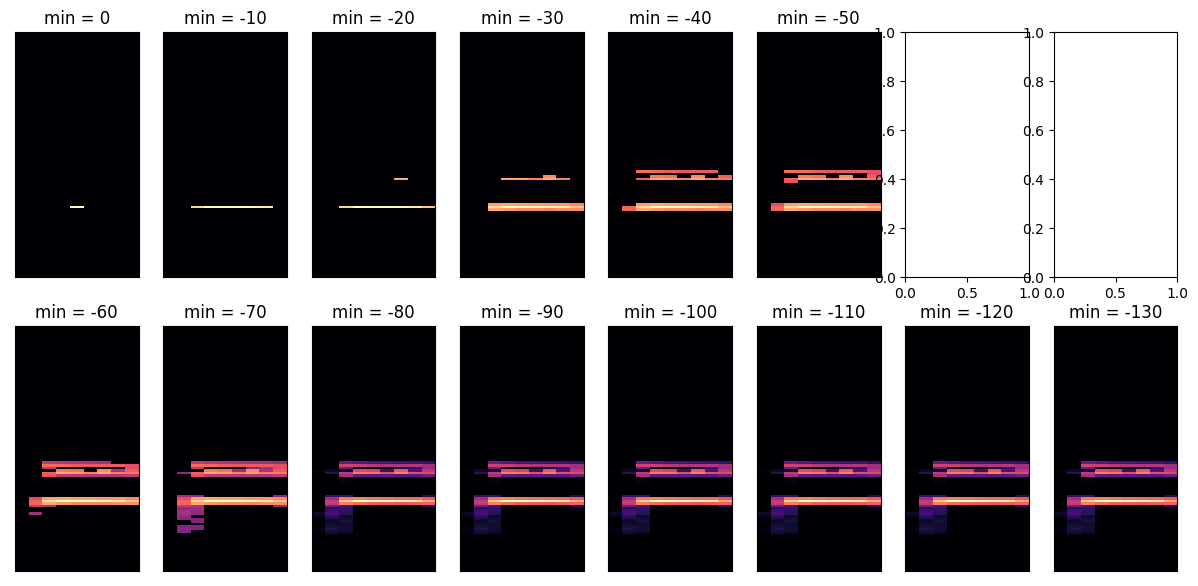

In [197]:
fig, ax = plt.subplots(2, 8, figsize=(15,7))

for i in [0 , -10, -20, -30, -40, -50, -60, -70, -80, -90, -100, -110, -120, -130]:
    
    idx = [0 , -10, -20, -30, -40, -50, -60, -70, -80, -90, -100, -110, -120, -130].index(i)
    if i in [-60, -70, -80, -90, -100, -110, -120, -130]:
        idx = idx - 6
    
    if i in [-60, -70, -80, -90, -100, -110, -120, -130]:
        idx2 = 1
    else:
        idx2 = 0
        
    array = audio_CQT("../guitar_audio_transcription/data/yui/00_BN1-129-Eb_comp_hex_cln.wav", 0, 0.2, min = i, max = -110)
    librosa.display.specshow(array, ax=ax[idx2, idx]) #y_axis='cqt_note'
    ax[idx2, idx].set_title(f"min = {i}")

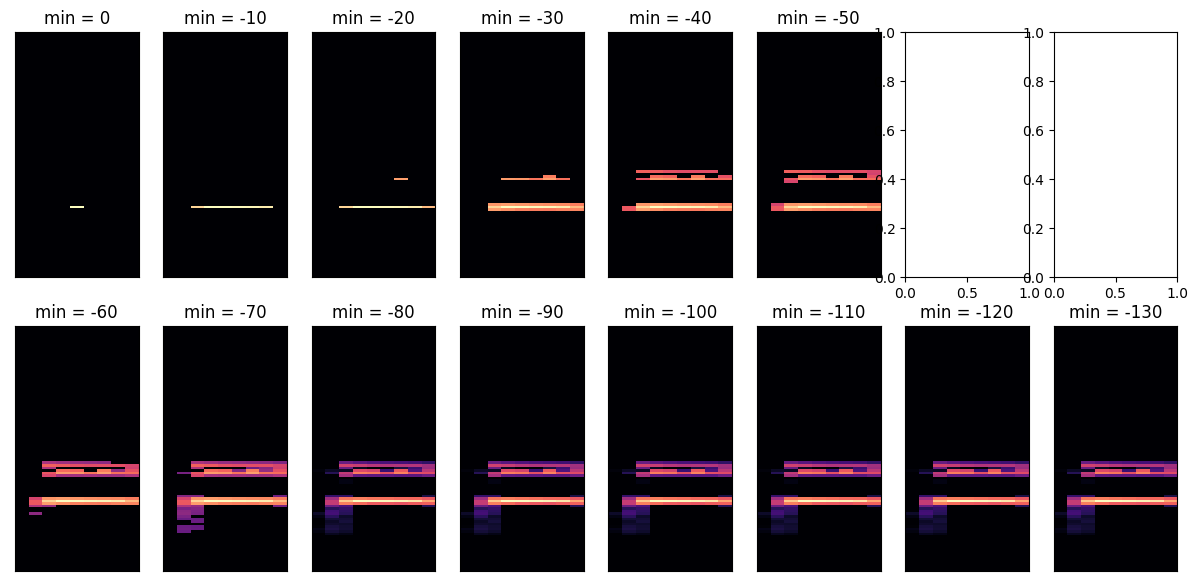

In [186]:
fig, ax = plt.subplots(2, 8, figsize=(15,7))

for i in [0 , -10, -20, -30, -40, -50, -60, -70, -80, -90, -100, -110, -120, -130]:
    
    idx = [0 , -10, -20, -30, -40, -50, -60, -70, -80, -90, -100, -110, -120, -130].index(i)
    if i in [-60, -70, -80, -90, -100, -110, -120, -130]:
        idx = idx - 6
    
    if i in [-60, -70, -80, -90, -100, -110, -120, -130]:
        idx2 = 1
    else:
        idx2 = 0
        
    array = audio_CQT("../guitar_audio_transcription/data/yui/00_BN1-129-Eb_comp_hex_cln.wav", 0, 0.2, min = i, max = -100)
    librosa.display.specshow(array, ax=ax[idx2, idx]) #y_axis='cqt_note'
    ax[idx2, idx].set_title(f"min = {i}")

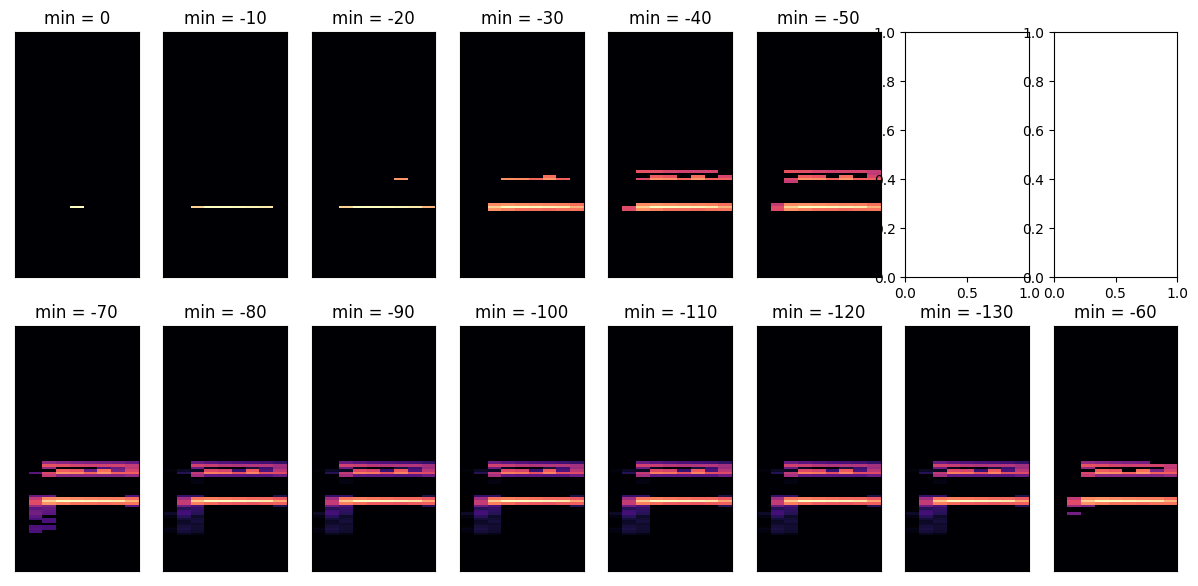

In [200]:
fig, ax = plt.subplots(2, 8, figsize=(15,7))

for i in [0 , -10, -20, -30, -40, -50, -60, -70, -80, -90, -100, -110, -120, -130]:
    
    idx = [0 , -10, -20, -30, -40, -50, -60, -70, -80, -90, -100, -110, -120, -130].index(i)
    if i in [-60, -70, -80, -90, -100, -110, -120, -130]:
        idx = idx - 7
    
    if i in [-60, -70, -80, -90, -100, -110, -120, -130]:
        idx2 = 1
    else:
        idx2 = 0
        
    array = audio_CQT("../guitar_audio_transcription/data/yui/00_BN1-129-Eb_comp_hex_cln.wav", 0, 0.2, min = i, max = -90)
    librosa.display.specshow(array, ax=ax[idx2, idx]) #y_axis='cqt_note'
    ax[idx2, idx].set_title(f"min = {i}")

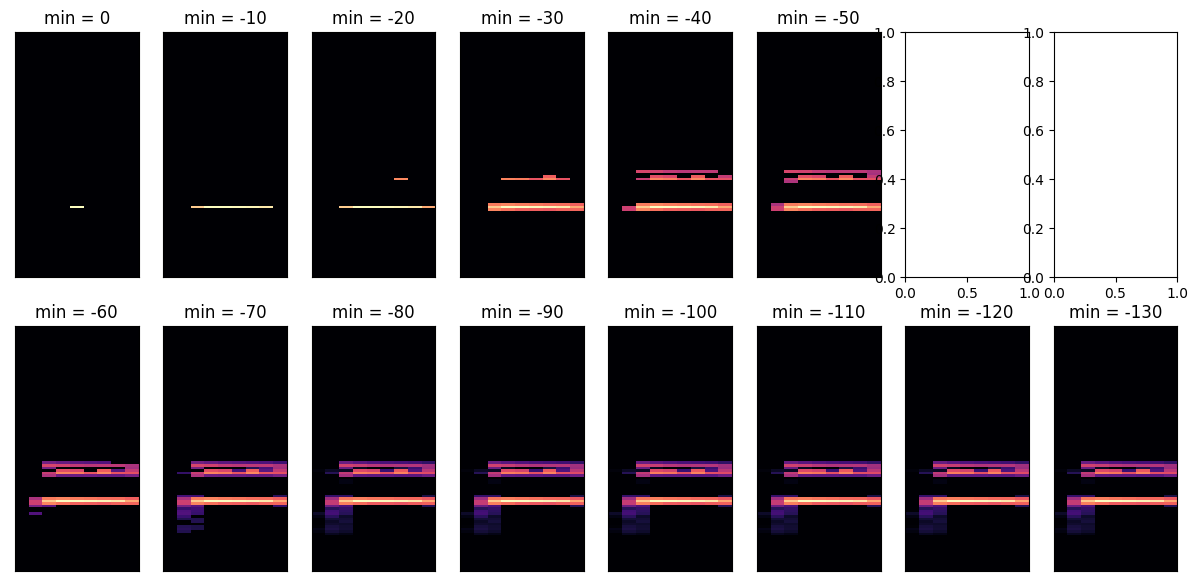

In [188]:
fig, ax = plt.subplots(2, 8, figsize=(15,7))

for i in [0 , -10, -20, -30, -40, -50, -60, -70, -80, -90, -100, -110, -120, -130]:
    
    idx = [0 , -10, -20, -30, -40, -50, -60, -70, -80, -90, -100, -110, -120, -130].index(i)
    if i in [-60, -70, -80, -90, -100, -110, -120, -130]:
        idx = idx - 6
    
    if i in [-60, -70, -80, -90, -100, -110, -120, -130]:
        idx2 = 1
    else:
        idx2 = 0
        
    array = audio_CQT("../guitar_audio_transcription/data/yui/00_BN1-129-Eb_comp_hex_cln.wav", 0, 0.2, min = i, max = -80)
    librosa.display.specshow(array, ax=ax[idx2, idx]) #y_axis='cqt_note'
    ax[idx2, idx].set_title(f"min = {i}")

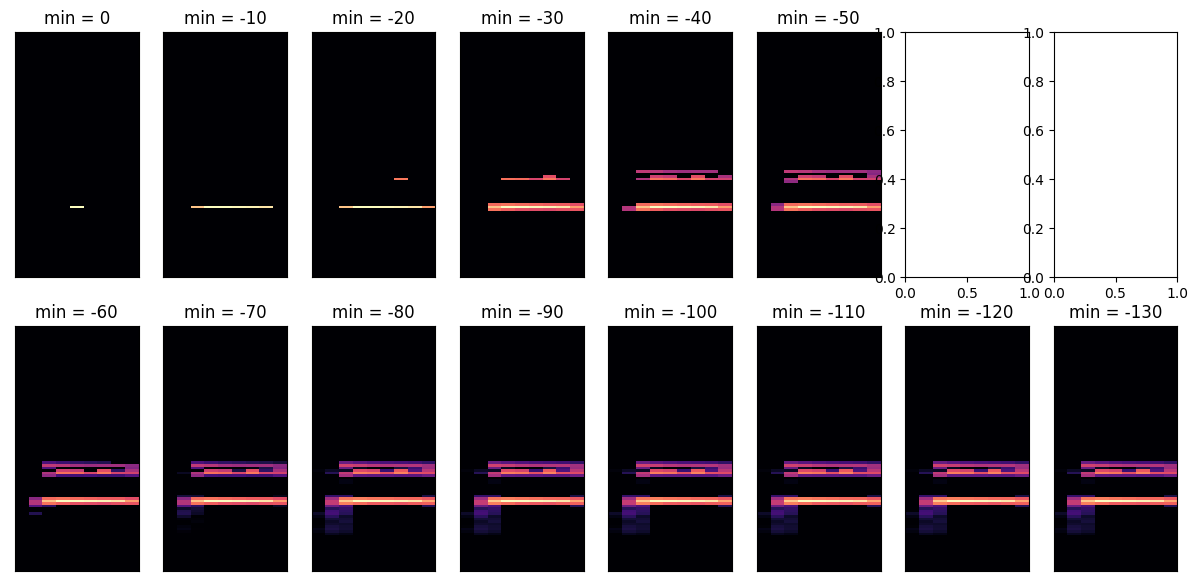

In [189]:
fig, ax = plt.subplots(2, 8, figsize=(15,7))

for i in [0 , -10, -20, -30, -40, -50, -60, -70, -80, -90, -100, -110, -120, -130]:
    
    idx = [0 , -10, -20, -30, -40, -50, -60, -70, -80, -90, -100, -110, -120, -130].index(i)
    if i in [-60, -70, -80, -90, -100, -110, -120, -130]:
        idx = idx - 6
    
    if i in [-60, -70, -80, -90, -100, -110, -120, -130]:
        idx2 = 1
    else:
        idx2 = 0
        
    array = audio_CQT("../guitar_audio_transcription/data/yui/00_BN1-129-Eb_comp_hex_cln.wav", 0, 0.2, min = i, max = -70)
    librosa.display.specshow(array, ax=ax[idx2, idx]) #y_axis='cqt_note'
    ax[idx2, idx].set_title(f"min = {i}")

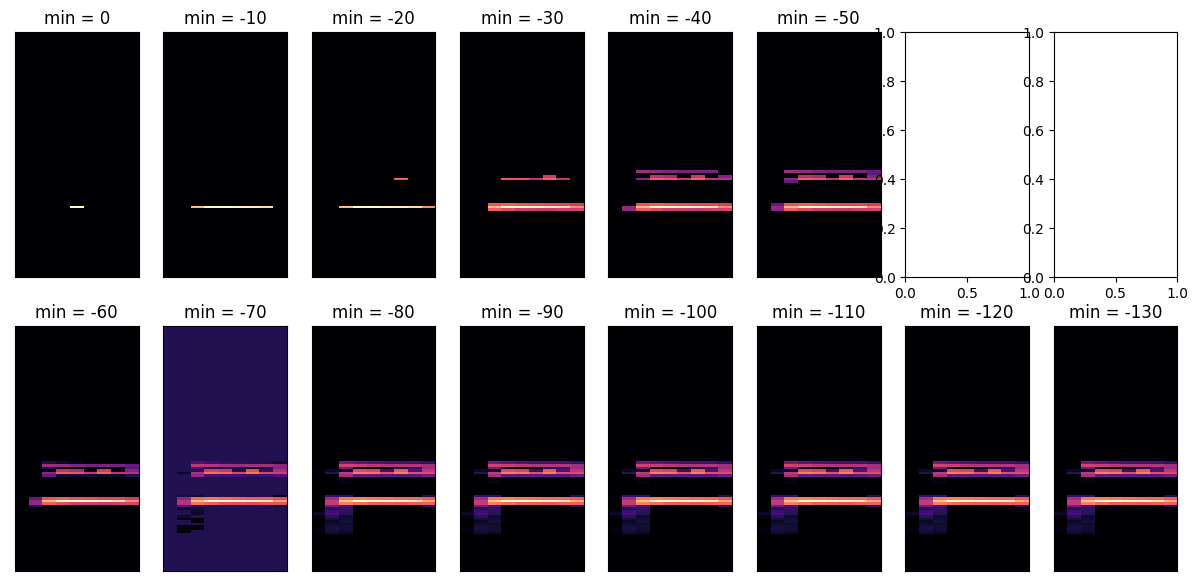

In [190]:
fig, ax = plt.subplots(2, 8, figsize=(15,7))

for i in [0 , -10, -20, -30, -40, -50, -60, -70, -80, -90, -100, -110, -120, -130]:
    
    idx = [0 , -10, -20, -30, -40, -50, -60, -70, -80, -90, -100, -110, -120, -130].index(i)
    if i in [-60, -70, -80, -90, -100, -110, -120, -130]:
        idx = idx - 6
    
    if i in [-60, -70, -80, -90, -100, -110, -120, -130]:
        idx2 = 1
    else:
        idx2 = 0
        
    array = audio_CQT("../guitar_audio_transcription/data/yui/00_BN1-129-Eb_comp_hex_cln.wav", 0, 0.2, min = i, max = -60)
    librosa.display.specshow(array, ax=ax[idx2, idx]) #y_axis='cqt_note'
    ax[idx2, idx].set_title(f"min = {i}")

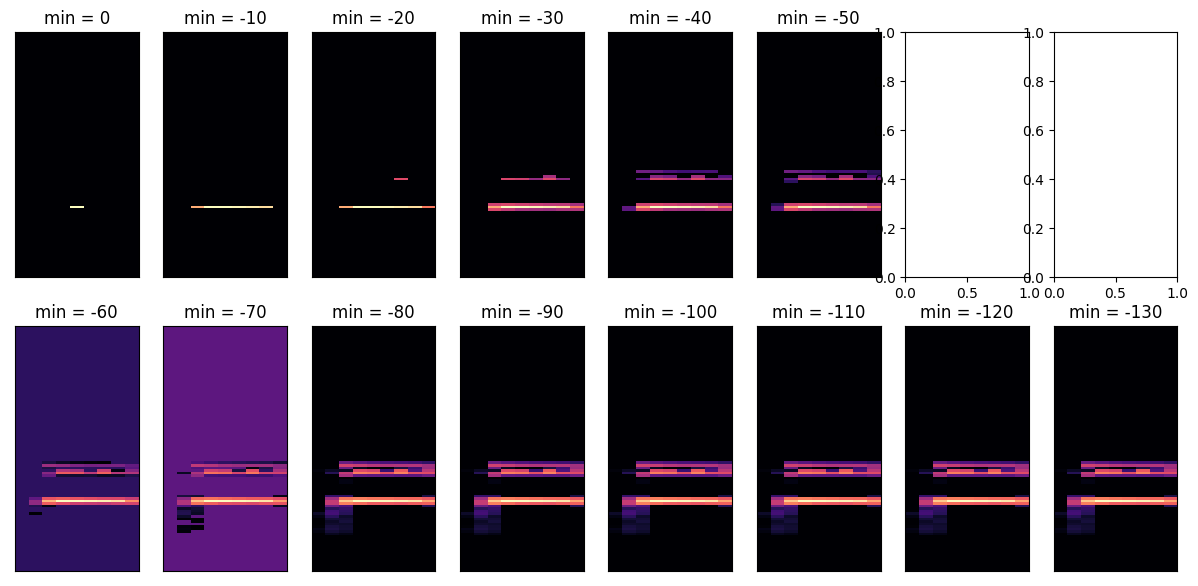

In [198]:
fig, ax = plt.subplots(2, 8, figsize=(15,7))

for i in [0 , -10, -20, -30, -40, -50, -60, -70, -80, -90, -100, -110, -120, -130]:
    
    idx = [0 , -10, -20, -30, -40, -50, -60, -70, -80, -90, -100, -110, -120, -130].index(i)
    if i in [-60, -70, -80, -90, -100, -110, -120, -130]:
        idx = idx - 6
    
    if i in [-60, -70, -80, -90, -100, -110, -120, -130]:
        idx2 = 1
    else:
        idx2 = 0
        
    array = audio_CQT("../guitar_audio_transcription/data/yui/00_BN1-129-Eb_comp_hex_cln.wav", 0, 0.2, min = i, max = -50)
    librosa.display.specshow(array, ax=ax[idx2, idx]) #y_axis='cqt_note'
    ax[idx2, idx].set_title(f"min = {i}")

In [217]:
get_spectros("../guitar_audio_transcription/data/yui")
# import matplotlib.pyplot as plt
# import librosa.display
# fig, ax = plt.subplots()


# img = librosa.display.specshow(a, sr=1, x_axis='time', y_axis='cqt_note', ax=ax)


KeyboardInterrupt: 

111

In [105]:
import matplotlib.pyplot as plt
import librosa.display


librosa.display.specshow(a[1][40]) #y_axis='cqt_note'
plt.savefig("test1.png")
plt.close()

# plt.colorbar()

(96, 9)

In [41]:
import PIL

with PIL.Image.open("test1.png") as im:
    ioom = np.array(im)

In [47]:
ioom.shape 

(480, 640, 4)